In [1]:
import scipy.io as io
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
font = {'family': 'serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [3]:
label_fontsize = 16 
title_fontsize = 18

In [4]:
sns.set(style="ticks", rc={"lines.linewidth": 0.6})

In [5]:
basefilename = "01112018_SponSleep_LFP" #"17092018_SponSleep_LFP","group"

In [6]:
basefolder = "/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/"

In [7]:
inputfolderpath = basefolder + "drosSleepStages_SciAdvances2023/data/lfp_data/timeseries/"

inputfilepath = inputfolderpath + "timeseries_neutral_ref_" + basefilename + ".mat"

In [8]:
print("Input file: " + inputfilepath)

Input file: /rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/drosSleepStages_SciAdvances2023/data/lfp_data/timeseries/timeseries_neutral_ref_01112018_SponSleep_LFP.mat


In [9]:
#Load the calibration data from some samples..
mat_timeseries = io.loadmat(inputfilepath)

In [10]:
mat_timeseries

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jun 18 22:48:09 2022',
 '__version__': '1.0',
 '__globals__': [],
 'cat1_size': array([[90]], dtype=uint8),
 'cat2_size': array([[366]], dtype=uint16),
 'chan_cat1_mean': array([[-0.61594948, -1.0412478 , -1.17624946, ..., -0.34389997,
         -0.57060364, -0.18640109],
        [ 0.37250713,  0.24501031, -0.01736103, ..., -0.37337134,
         -0.51770224, -0.14327412],
        [ 1.38057529,  1.74023374,  1.35658066, ..., -0.18721049,
         -0.23106224,  0.01952846],
        ...,
        [-0.2541168 , -0.30950035,  0.31916341, ..., -0.778909  ,
         -0.25211961, -0.31525745],
        [-1.41718319, -1.95070316, -1.74226801, ..., -0.4771135 ,
         -0.29089539, -0.19327366],
        [-1.97694026, -2.6993602 , -2.87091027, ..., -0.21606289,
         -0.32649074, -0.07067002]]),
 'chan_cat1_se': array([[1.34434488, 1.42687394, 1.54606774, ..., 0.32183654, 0.347807  ,
         0.31725202],
        [1.2575541

In [11]:
chan_cat1_mean = mat_timeseries['chan_cat1_mean']
chan_cat1_se = mat_timeseries['chan_cat1_se']
chan_cat2_mean = mat_timeseries['chan_cat2_mean']
chan_cat2_se = mat_timeseries['chan_cat2_se']

In [12]:
print(chan_cat1_mean.shape)

(15000, 15)


In [13]:
centralchan_cat1_mean = chan_cat1_mean[:,0:5]
middlechan_cat1_mean = chan_cat1_mean[:,5:10]
periphchan_cat1_mean = chan_cat1_mean[:,10:15]

In [14]:
print(centralchan_cat1_mean.shape)

(15000, 5)


In [15]:
centralchan_cat2_mean = chan_cat2_mean[:,0:5]
middlechan_cat2_mean = chan_cat2_mean[:,5:10]
periphchan_cat2_mean = chan_cat2_mean[:,10:15]

In [16]:
print(centralchan_cat2_mean.shape)

(15000, 5)


In [17]:
nchan = 5 # 7, number of channels to display..

/home/srj34/deeplabcut-env/lib/python3.6/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


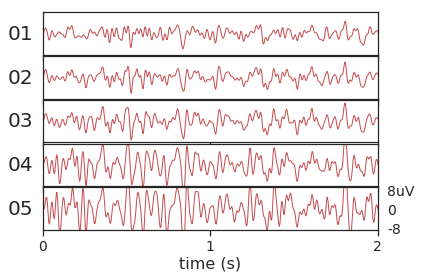

In [18]:
fig, ax1 = plt.subplots(ncols=5, sharex=True, sharey=False, figsize=(6, 4))
fig.subplots_adjust(wspace=0.05, hspace=0.15)

ax = [0]*nchan
for i, j in zip(range(nchan), np.arange(0,(nchan)*(nchan),nchan)):
    ax[i] = plt.subplot2grid(((nchan)*(nchan), 1), (j, 0), rowspan=nchan, fig = fig)
    plt.setp(ax[i], xticks=[0, 250, 500, 750, 1000], xticklabels=['0','1', '2', '3','4']) 
    #plt.setp(ax[i], xticks=[0, 5000, 10000, 15000], xticklabels=['0','20', '40', '60'])  
    
    yticks = [-8, 0, 8]
    yticklabels = ['-8', '0', '8uV']
    #yticks = [-5, -3, 0, 3, 5]
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(yticklabels)
    ax[i].set_ylim([np.min(yticks)-1, np.max(yticks)+1])

    ax[i].set_xlim([0, 500]) 
    #ax[i].set_xlim([0, 15000])
    ax[i].set_ylabel(str(i+1).zfill(2), rotation=0,ha='right',va='center', fontsize=20, labelpad=10)
    
x = list(range(0, centralchan_cat1_mean.shape[0]))

for chanidx in np.arange(0,nchan):
    ax[chanidx].plot(x,centralchan_cat1_mean[:,chanidx], 'r-', alpha=1, linewidth=1.0)
    
#x-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.xaxis.set_ticklabels([])

    
#y-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.yaxis.set_ticklabels([])
    
for idx in np.arange(0,nchan):

    ax[idx].tick_params(axis = 'y', labelsize = 10)
    for tick in ax[idx].yaxis.get_major_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('left')
        
    ax[idx].axes.yaxis.tick_right()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax[idx].set_xlabel('time (s)', rotation=0,ha='center',va='center', fontsize=label_fontsize, labelpad=10)
plt.tight_layout()

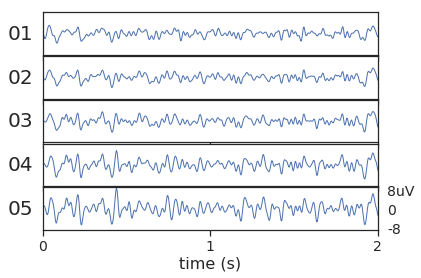

In [19]:
fig, ax1 = plt.subplots(ncols=5, sharex=True, sharey=False, figsize=(6, 4))
fig.subplots_adjust(wspace=0.05, hspace=0.15)

ax = [0]*nchan
for i, j in zip(range(nchan), np.arange(0,(nchan)*(nchan),nchan)):
    ax[i] = plt.subplot2grid(((nchan)*(nchan), 1), (j, 0), rowspan=nchan, fig = fig)
    plt.setp(ax[i], xticks=[0, 250, 500, 750, 1000], xticklabels=['0','1', '2', '3','4']) 
    #plt.setp(ax[i], xticks=[0, 5000, 10000, 15000], xticklabels=['0','20', '40', '60'])
    
    yticks = [-8, 0,  8]
    yticklabels = ['-8', '0', '8uV']
    #yticks = [-5, -3, 0, 3, 5]
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(yticklabels)
    ax[i].set_ylim([np.min(yticks)-1, np.max(yticks)+1])
    
    ax[i].set_xlim([0, 500]) 
    #ax[i].set_xlim([0, 15000])
    ax[i].set_ylabel(str(i+1).zfill(2), rotation=0,ha='right',va='center', fontsize=20, labelpad=10)
    
x = list(range(0, centralchan_cat2_mean.shape[0]))

for chanidx in np.arange(0,nchan):
    ax[chanidx].plot(x,centralchan_cat2_mean[:,chanidx], 'b-', alpha=1, linewidth=1.0)
    
#x-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.xaxis.set_ticklabels([])

    
#y-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.yaxis.set_ticklabels([])
    
for idx in np.arange(0,nchan):

    ax[idx].tick_params(axis = 'y', labelsize = 10)
    for tick in ax[idx].yaxis.get_major_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('left')
        
    ax[idx].axes.yaxis.tick_right()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax[idx].set_xlabel('time (s)', rotation=0,ha='center',va='center', fontsize=label_fontsize, labelpad=10)
plt.tight_layout()

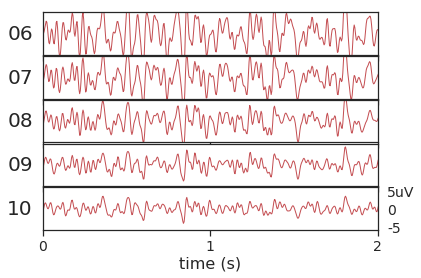

In [20]:
fig, ax1 = plt.subplots(ncols=5, sharex=True, sharey=False, figsize=(6, 4))
fig.subplots_adjust(wspace=0.05, hspace=0.15)

ax = [0]*nchan
for i, j in zip(range(nchan), np.arange(0,(nchan)*(nchan),nchan)):
    ax[i] = plt.subplot2grid(((nchan)*(nchan), 1), (j, 0), rowspan=nchan, fig = fig)
    plt.setp(ax[i], xticks=[0, 250, 500, 750, 1000], xticklabels=['0','1', '2', '3','4']) 
    #plt.setp(ax[i], xticks=[0, 5000, 10000, 15000], xticklabels=['0','20', '40', '60'])
    #yticks = [-1.5, 0,  1.5]
    yticks = [-5, 0, 5]
    yticklabels = ['-5', '0', '5uV']
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(yticklabels)
    ax[i].set_ylim([np.min(yticks)-1, np.max(yticks)+1])
    ax[i].set_xlim([0, 500]) 
    #ax[i].set_xlim([0, 15000])
    ax[i].set_ylabel(str(i+6).zfill(2), rotation=0,ha='right',va='center', fontsize=20, labelpad=10)
    
x = list(range(0, middlechan_cat1_mean.shape[0]))

for chanidx in np.arange(0,nchan):
    ax[chanidx].plot(x,middlechan_cat1_mean[:,chanidx], 'r-', alpha=1, linewidth=1.0)
    
#x-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.xaxis.set_ticklabels([])

    
#y-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.yaxis.set_ticklabels([])
    
for idx in np.arange(0,nchan):

    ax[idx].tick_params(axis = 'y', labelsize = 10)
    for tick in ax[idx].yaxis.get_major_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('left')
        
    ax[idx].axes.yaxis.tick_right()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax[idx].set_xlabel('time (s)', rotation=0,ha='center',va='center', fontsize=label_fontsize, labelpad=10)
plt.tight_layout()

Text(0.5, 12.500000000000028, 'time (s)')

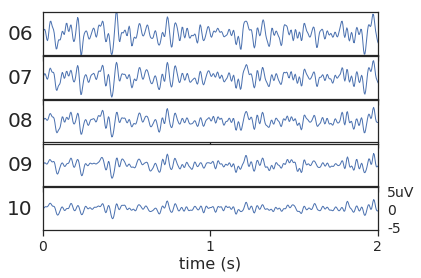

In [21]:
fig, ax1 = plt.subplots(ncols=5, sharex=True, sharey=False, figsize=(6, 4))
fig.subplots_adjust(wspace=0.05, hspace=0.15)

ax = [0]*nchan
for i, j in zip(range(nchan), np.arange(0,(nchan)*(nchan),nchan)):
    ax[i] = plt.subplot2grid(((nchan)*(nchan), 1), (j, 0), rowspan=nchan, fig = fig)
    plt.setp(ax[i], xticks=[0, 250, 500, 750, 1000], xticklabels=['0','1', '2', '3','4']) 
    #plt.setp(ax[i], xticks=[0, 5000, 10000, 15000], xticklabels=['0','20', '40', '60'])
    #yticks = [-1.5, 0,  1.5]
    yticks = [-5, 0, 5]
    yticklabels = ['-5', '0', '5uV']
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(yticklabels)
    ax[i].set_ylim([np.min(yticks)-1, np.max(yticks)+1])
    ax[i].set_xlim([0, 500]) 
    #ax[i].set_xlim([0, 15000])
    ax[i].set_ylabel(str(i+6).zfill(2), rotation=0,ha='right',va='center', fontsize=20, labelpad=10)
    
x = list(range(0, middlechan_cat2_mean.shape[0]))

for chanidx in np.arange(0,nchan):
    ax[chanidx].plot(x,middlechan_cat2_mean[:,chanidx], 'b-', alpha=1, linewidth=1.0)
    
#x-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.xaxis.set_ticklabels([])

    
#y-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.yaxis.set_ticklabels([])
    
for idx in np.arange(0,nchan):

    ax[idx].tick_params(axis = 'y', labelsize = 10)
    for tick in ax[idx].yaxis.get_major_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('left')
        
    ax[idx].axes.yaxis.tick_right()

plt.tight_layout() 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax[idx].set_xlabel('time (s)', rotation=0,ha='center',va='center', fontsize=label_fontsize, labelpad=10)

Text(0.5, 12.500000000000028, 'time (s)')

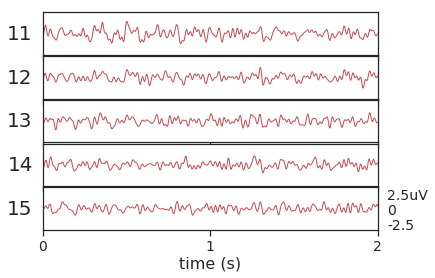

In [22]:
fig, ax1 = plt.subplots(ncols=5, sharex=True, sharey=False, figsize=(6, 4))
fig.subplots_adjust(wspace=0.05, hspace=0.15)

ax = [0]*nchan
for i, j in zip(range(nchan), np.arange(0,(nchan)*(nchan),nchan)):
    ax[i] = plt.subplot2grid(((nchan)*(nchan), 1), (j, 0), rowspan=nchan, fig = fig)
    plt.setp(ax[i], xticks=[0, 250, 500, 750, 1000], xticklabels=['0','1', '2', '3','4']) 
    #plt.setp(ax[i], xticks=[0, 5000, 10000, 15000], xticklabels=['0','20', '40', '60'])
    #yticks = [-0.75,   0.75]
    yticks = [-2.5, 0, 2.5]
    yticklabels = ['-2.5', '0', '2.5uV']
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(yticklabels)
    ax[i].set_ylim([np.min(yticks)-1, np.max(yticks)+1])
    ax[i].set_xlim([0, 500]) 
    #ax[i].set_xlim([0, 15000])
    ax[i].set_ylabel(str(i+11).zfill(2), rotation=0,ha='right',va='center', fontsize=20, labelpad=10)
    
x = list(range(0, periphchan_cat1_mean.shape[0]))

for chanidx in np.arange(0,nchan):
    ax[chanidx].plot(x,periphchan_cat1_mean[:,chanidx], 'r-', alpha=1, linewidth=1.0)
    
#x-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.xaxis.set_ticklabels([])

    
#y-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.yaxis.set_ticklabels([])
    
for idx in np.arange(0,nchan):

    ax[idx].tick_params(axis = 'y', labelsize = 10)
    for tick in ax[idx].yaxis.get_major_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('left')
        
    ax[idx].axes.yaxis.tick_right()

plt.tight_layout() 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax[idx].set_xlabel('time (s)', rotation=0,ha='center',va='center', fontsize=label_fontsize, labelpad=10)

Text(0.5, 12.500000000000028, 'time (s)')

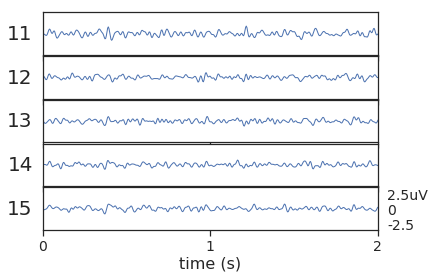

In [23]:
fig, ax1 = plt.subplots(ncols=5, sharex=True, sharey=False, figsize=(6, 4))
fig.subplots_adjust(wspace=0.05, hspace=0.15)

ax = [0]*nchan
for i, j in zip(range(nchan), np.arange(0,(nchan)*(nchan),nchan)):
    ax[i] = plt.subplot2grid(((nchan)*(nchan), 1), (j, 0), rowspan=nchan, fig = fig)
    plt.setp(ax[i], xticks=[0, 250, 500, 750, 1000], xticklabels=['0','1', '2', '3','4']) 
    #plt.setp(ax[i], xticks=[0, 5000, 10000, 15000], xticklabels=['0','20', '40', '60'])
    #yticks = [-0.75,   0.75]
    yticks = [-2.5, 0, 2.5]
    yticklabels = ['-2.5', '0', '2.5uV']
    ax[i].set_yticks(yticks)
    ax[i].set_yticklabels(yticklabels)
    ax[i].set_ylim([np.min(yticks)-1, np.max(yticks)+1])
    ax[i].set_xlim([0, 500]) 
    #ax[i].set_xlim([0, 15000])
    ax[i].set_ylabel(str(i+11).zfill(2), rotation=0,ha='right',va='center', fontsize=20, labelpad=10)
    
x = list(range(0, periphchan_cat2_mean.shape[0]))

for chanidx in np.arange(0,nchan):
    ax[chanidx].plot(x,periphchan_cat2_mean[:,chanidx], 'b-', alpha=1, linewidth=1.0)
    
#x-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.xaxis.set_ticklabels([])

    
#y-axis related stuff
for i in np.arange(0,nchan-1):
    ax[i].axes.yaxis.set_ticklabels([])
    
for idx in np.arange(0,nchan):

    ax[idx].tick_params(axis = 'y', labelsize = 10)
    for tick in ax[idx].yaxis.get_major_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('left')
        
    ax[idx].axes.yaxis.tick_right()

plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax[idx].set_xlabel('time (s)', rotation=0,ha='center',va='center', fontsize=label_fontsize, labelpad=10)